In [9]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
# read data
data=np.loadtxt('./data/ex1data2.txt',delimiter=',')

In [3]:
# seperate them into X and y
X = np.c_[data[:,:-1]]
y = np.c_[data[:,-1]]

# normalized data: 1 subtract the mean; 2 divide the standard deviation
X_mean = np.mean(X,0)
X_normalized = X - X_mean
X_std = np.std(X_normalized,0)
X_normalized /= X_std

# add an additional column as 1 for X
m = len(y)
X_normalized = np.c_[np.ones(m), X_normalized]

In [4]:
# cost function
def computeCost(X,y,theta):
    m=y.size
    h=X.dot(theta)
    d=h-y
    J=d.T.dot(d)/(2*m)
    return(J)

In [5]:
computeCost(X_normalized,y,[[0],[0],[0]])

array([[  6.55915481e+10]])

In [11]:
def gradientDescent(X,y,theta, alpha=0.01, num_iters=50):
    m=y.size
    J_history=np.zeros(num_iters)
    for i in range(num_iters):
        h=X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[i] = computeCost(X,y,theta) 
    return(theta,J_history)

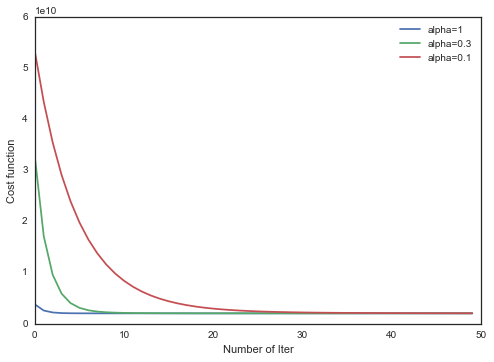

In [32]:
# run gradient descent
theta1,cost_J1=gradientDescent(X_normalized,y,[[0],[0],[0]],1)
theta2,cost_J2=gradientDescent(X_normalized,y,[[0],[0],[0]],0.3)
theta3,cost_J3=gradientDescent(X_normalized,y,[[0],[0],[0]],0.1)
# plot
plt.plot(cost_J1,label='alpha=1')
plt.plot(cost_J2,label='alpha=0.3')
plt.plot(cost_J3,label='alpha=0.1')
plt.xlabel('Number of Iter')
plt.ylabel('Cost function')
plt.legend()

In [45]:
# make predictions
new_house = np.c_[1650,3]
# normalize
new_house_normalized=(new_house-X_mean)/X_std
# predict
new_house_normalized=np.c_[1,new_house_normalized]
print(new_house_normalized.dot(theta1))

[[ 293081.46433491]]


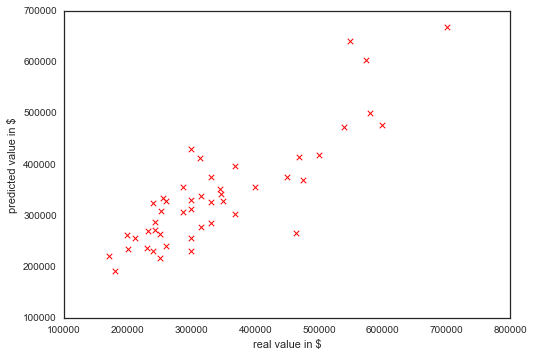

In [48]:
# error plot
y_predict=X_normalized.dot(theta1)
plt.scatter(y,y_predict, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('real value in $')
plt.ylabel('predicted value in $')

In [64]:
# normal equations
X_ext = np.c_[np.ones(m), X]
theta=np.linalg.inv(X_ext.T.dot(X_ext)).dot(X_ext.T).dot(y)

[[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]
[[ 340412.65957447]
 [ 109447.79646961]
 [  -6578.35485416]]


In [66]:
# make predictions
new_house = np.c_[1650,3]
# predict
new_house_ext=np.c_[1,new_house]
print(new_house_ext.dot(theta))

[[ 293081.46433489]]
